In [59]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [192]:
df=pd.read_csv('nba_games.csv')
df

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,NaN,NaN,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,1,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,0,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113

In [3]:
df['season'].max()

2022

In [4]:
df['season'].min()

2016

In [5]:
df.isnull().sum()

Unnamed: 0    0
mp            0
mp.1          0
fg            0
fga           0
             ..
total_opp     0
home_opp      0
season        0
date          0
won           0
Length: 151, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17772 entries, 0 to 17771
Columns: 151 entries, Unnamed: 0 to won
dtypes: bool(1), float64(140), int64(7), object(3)
memory usage: 20.4+ MB


In [7]:
pd.set_option('display.max_columns', None)
print(df)

       Unnamed: 0     mp   mp.1    fg    fga    fg%    3p   3pa    3p%    ft  \
0               0  240.0  240.0  39.0   81.0  0.481   6.0  20.0  0.300  14.0   
1               1  240.0  240.0  36.0  100.0  0.360   7.0  31.0  0.226  16.0   
2               2  240.0  240.0  37.0   85.0  0.435   8.0  19.0  0.421  17.0   
3               3  240.0  240.0  41.0   89.0  0.461   8.0  21.0  0.381  17.0   
4               4  240.0  240.0  27.0   86.0  0.314   6.0  26.0  0.231  15.0   
...           ...    ...    ...   ...    ...    ...   ...   ...    ...   ...   
17767       17767  240.0  240.0  35.0   81.0  0.432  11.0  26.0  0.423  27.0   
17768       17768  240.0  240.0  37.0   74.0  0.500  13.0  25.0  0.520  26.0   
17769       17769  240.0  240.0  42.0   89.0  0.472  14.0  33.0  0.424  10.0   
17770       17770  240.0  240.0  41.0   85.0  0.482   9.0  26.0  0.346  26.0   
17771       17771  240.0  240.0  33.0   85.0  0.388  12.0  44.0  0.273  28.0   

        fta    ft%   orb   drb   trb   

In [8]:
df.isnull()


,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,Fals

In [193]:
df.sort_values('date')

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
16086,16086,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,NaN,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,NaN,NaN,7.0,20.0,1.000,2.0,7.0,0.667,10.0,15.0,1.0,3.0,5.0,6.0,9.0,3.0,3.0,5.0,5.0,18.0,5.0,1.000,1.000,1.000,0.750,19.8,26.3,13.6,43.4,5.3,6.3,37.5,38.9,201.0,120.0,NOP,95,0,1,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,NaN,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,NaN,NaN,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,GSW,111,1,2016,2015-10-27,False
16904,16904,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,NaN,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,NaN,NaN,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,95,0,1,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,NaN,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,NaN,NaN,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,97,1,2016,2015-10-27,False
16905,16905,240.0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,NaN,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,NaN,NaN,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,97,1,0,240.0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,NaN,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,NaN,NaN,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,95,0,2016,2015-10-27,True
16087,16087,240.0,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,NaN,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,NaN,NaN,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,GSW,111,1,0,240.0,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,NaN,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,

In [194]:
df=df.reset_index(drop=True)
df

,Unnamed: 0,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,+/-,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,mp_max,mp_max.1,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,index_opp,mp_opp,mp_opp.1,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,+/-_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,mp_max_opp,mp_max_opp.1,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,1,240.0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,NaN,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,NaN,NaN,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,0,240.0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,NaN,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,NaN,NaN,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,2,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,NaN,NaN,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,1,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,3,240.0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,NaN,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,NaN,NaN,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,0,240.0,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,NaN,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113

In [195]:
del df['mp.1']
del df['mp_opp.1']
del df['Unnamed: 0']
del df['index_opp'] 

In [196]:
df['won'].value_counts()

True     8886
False    8886
Name: won, dtype: int64

In [197]:
nulls= pd.isnull(df)
nulls= nulls.sum()
nulls=nulls[nulls>0]
nulls

+/-             17772
mp_max          17772
mp_max.1        17772
+/-_opp         17772
mp_max_opp      17772
mp_max_opp.1    17772
dtype: int64

In [198]:
valid= df.columns[~df.columns.isin(nulls.index)]
valid

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp',
       'team_opp', 'total_opp', 'home_opp', 'season', 'date', 'won'],
      dtype='object', length=141)

In [199]:
df=df[valid].copy()
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True
4,240.0,27.0,86.0,0.314,6.0,26.0,0.231,15.0,20.

In [16]:
df['mov'] = df['total'] - df['total_opp']
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,mov
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,3
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,-3
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,-8
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,8
4,240.0,27.0,86.0,0.314,6.0,26.0,

In [17]:
df.dtypes

mp          float64
fg          float64
fga         float64
fg%         float64
3p          float64
             ...   
home_opp      int64
season        int64
date         object
won            bool
mov           int64
Length: 142, dtype: object

In [18]:
df.describe()

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season,mov
count,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.0,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.0,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000
mean,241.564258,39.954817,87.020538,0.460049,11.022901,30.800923,0.356935,17.415710,22.627279,0.770461,10.098863,34.031904,44.130767,23.655413,7.645285,4.837497,13.447389,20.165485,108.348244,0.559665,0.523530,0.354005,0.263397,22.703714,77.297361,50.000867,59.126868,7.787936,8.644880,12.169508,100.0,110.617359,110.617359,9.767950,19.216802,0.820324,3.804918,8.257090,0.778250,6.423250,7.849595,0.991401,3.726086,8.758609,11.273295,7.665204,2.577031,2.135269,4.011535,4.352071,26.599989,13.087553,0.938462,0.936513,0.827522,1.107340,19.926553,38.582759,25.095403,42.718473,5.937964,9.013302,40.079811,34.864979,178.187430,118.660758,108.348244,0.500000,241.564258,39.954817,87.020538,0.460049,11.022901,30.800923,0.356935,17.415710,22.627279,0.770461,10.098863,34.031904,44.130767,23.655413,7.645285,4.837497,13.447389,20.165485,108.348244,0.559665,0.523530,0.354005,0.263397,22.703714,77.297361,50.000867,59.126868,7.787936,8.644880,12.169508,100.0,110.617359,110.617359,9.767950,19.216802,0.820324,3.804918,8.257090,0.778250,6.423250,7.849595,0.991401,3.726086,8.758609,11.27329

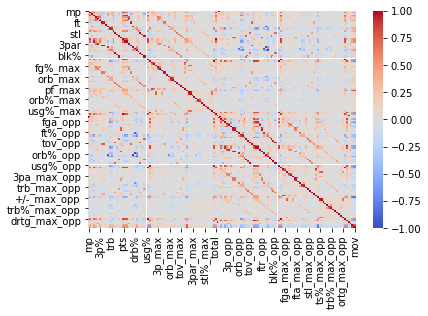

In [19]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.show()

In [20]:
X = df.drop(['mov', 'team', 'team_opp', 'won', 'date'], axis=1)  # Remove the specified columns to get the features
y = df['mov']                                      # Target variable

# Split the data into a training set and a testing set (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
scaler = StandardScaler()

# Fit transform numeric data
scaler.fit(X_train)
X_scaled = pd.DataFrame(
    scaler.transform(X_train),
    # index is important to ensure we can concatenate with other columns
    index=X_train.index,
    columns=X_train.columns
)
X_scaled

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
7625,3.332005,1.347431,0.825184,0.826512,-0.253094,-1.492532,1.890060,1.430482,1.559174,-0.057357,-0.565796,1.840719,1.197621,1.227980,1.152725,0.463084,0.659926,0.670535,1.690694,0.692220,0.543259,-1.732172,1.108556,-0.791918,0.591922,0.291096,0.477279,0.625959,0.472641,0.214054,0.0,0.271454,-0.411970,1.295019,-0.052593,-0.853140,0.134510,-1.260482,1.024357,1.290347,1.601189,0.195991,1.368215,0.483702,1.445789,0.123420,0.397025,1.613274,-0.709808,1.819704,0.493038,1.336497,-0.934747,-1.028331,-1.863868,-0.293840,-0.148102,0.465360,0.406746,-0.931844,0.319023,0.156558,-0.710461,-0.669211,-1.057143,-0.239044,1.690694,1.002747,3.332005,0.958179,2.330865,-0.490482,1.769502,2.178134,0.207449,-0.740555,-0.634552,-0.476837,-0.037531,0.915971,0.732383,0.455252,0.117591,1.273668,0.403207,1.606974,0.987726,-0.297348,-0.062984,1.257255,-0.973920,-0.592077,0.791767,-0.291419,-0.129040,-0.275956,0.497502,-0.109046,0.0,-0.411970,0.271454,0.093426,-0.053654,-0.445869,0.795121,0.668898,-0.699252,-0.152679,-0.573666,0.193145,-0.449645,-0.301338,-0.709567,-0.249941,0.397611,-0.122223,1.390216,1.817849,-0.234879,-0.681242,-0.304927,-0.279646,-0.910040,-0.126793,-0.170719,4.509568,8.019021,3.875535,0.624181,-0.669965,-0.706130,-1.140641,1.517173,0.217391,0.987726,-1.002747,-0.970433
2737,-0.222250,-1.134936,-0.283667,-1.092068,-1.262278,-0.225767,-1.666204,2.097143,2.791635,-0.705791,1.045189,1.101645,1.502552,-1.662321,0.120695,0.463084,-0.120707,-0.036276,-0.335711,-0.961874,-1.333668,-0.147063,2.617114,0.388792,-0.807624,-0.260035,-1.509500,0.037898,0.657933,-0.321262,0.0,-0.681733,-0.858951,-0.306310,0.886157,-0.959960,-1.195804,-0.485736,-0.509776,0.571969,1.291491,0.195991,0.764699,0.091840,-0.090144,-1.365471,2.303309,-0.125613,-0.013181,0.716616,0.059861,-0.231250,-0.594878,-1.014594,-1.294035,-0.253141,-0.382792,0.122678,-0.510344,-0.789911,0.098586,-0.381995,-0.710461,0.091562,-0.393624,-0.600164,-0.335711,1.002747,-0.222250,-0.567247,0.676052,-1.056334,0.505851,1.166321,-0.350246,-0.404660,0.053329,-1.160115,1.572069,1.286941,1.953442,-0.705078,0.804861,1.273668,0.924215,1.372009,-0.496715,-0.979704,-0.760184,0.944592,-0.140449,0.807482,-0.388941,0.259711,-0.502188,0.727030,1.308360,0.635481,0.0,-0.858951,-0.681733,0.093426,0.884601,0.227062,0.131064,1.056275,-0.124213,0.916248,0.659587,0.193145,0.152976,1.271104,1.445114,-0.624457,2.293580,2.479044,-0.008906,-0.382607,-0.380102,-0.904404,-0.290401,-0.361990,-0.437010,2.767376,0.114625,-0.416031,0.196773,-0.476963,0.340703,0.659503,-0.526760,-0.425497,-0.987496,-0.685066,-0.496715,-1.002747,1.514823
16393,3.332005,0.392674,1.102397,-0.324636,2.269864,1.801057,0.975911,1.597148,1.148353,0.968525,-0.028801,-0.376503,-0.327034,2.384100,1.496735,0.463084,1.180348,-0.036276,1.768632,0.708436,0.361621,1.391766,0.677540,-0.430760,-1.264901,-1.343292,2.685932,0.971877,0.125219,0.600672,0.0,

In [22]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    # index is important to ensure we can concatenate with other columns
    index=X_test.index,
    columns=X_test.columns
)
X_test_scaled

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
17329,-0.22225,0.392674,-0.422273,0.735151,1.260681,0.534292,1.120837,0.263825,0.600593,-0.647723,-0.028801,1.101645,0.892690,0.649920,1.840745,0.866892,2.741614,1.377347,0.833369,1.000335,1.088173,0.732268,0.623663,0.083197,0.605779,0.823223,0.527705,1.456162,0.333672,2.325579,0.0,-0.080624,-0.558098,1.695351,1.120844,1.132448,2.129981,1.838504,-0.818446,-0.146409,-0.257004,0.195991,-0.442332,1.267427,0.524229,0.867865,1.350167,0.743831,2.076701,1.819704,2.081354,0.888569,0.303348,0.294997,-0.644426,2.336815,0.153644,0.574726,-0.041135,0.960592,0.583547,0.365995,1.469609,-0.110519,-0.688521,-0.419604,0.833369,1.002747,-0.22225,0.004788,0.400250,-0.289696,-1.515990,-1.236734,-1.320636,1.778661,1.566668,0.518797,-0.305798,-0.196940,-0.336045,0.068476,2.179401,-0.745212,0.403207,0.197184,0.362698,-0.346088,-0.775341,-1.394588,1.245061,-0.605934,-0.083346,-0.823545,0.092832,1.764602,-0.591366,0.099421,0.0,-0.558098,-0.080624,-0.714996,-0.757346,-1.810597,-1.197049,-0.493234,-1.734324,0.559939,0.351273,0.193145,1.358219,0.484883,1.445114,0.124575,0.397611,-0.989312,-0.008906,-0.382607,-0.960997,-0.346500,-1.074839,-1.537689,-0.721968,-0.250847,-0.304999,0.837358,-0.188453,-0.179588,0.013612,-0.341333,-0.583403,-0.589628,-1.134830,-0.324084,0.362698,-1.002747,-1.467484
11605,-0.22225,-2.089692,1.379609,-2.937559,-0.505390,0.534292,-1.108795,-0.069505,0.326713,-0.879998,0.508194,-0.191734,0.130363,-1.084261,0.464705,-1.152144,0.399715,0.434932,-1.894484,-2.761917,-2.695954,0.084340,-0.055188,-0.416869,-0.073208,-1.267274,0.305831,0.314633,-0.847564,0.005876,0.0,-2.553758,-0.575290,-1.507307,-1.226030,1.132448,-1.195804,-1.260482,1.024357,-0.864788,-0.876402,0.195991,0.764699,-1.083747,-0.090144,-1.365471,0.397025,-0.995056,-0.013181,-0.386473,-2.106024,-1.351069,1.420060,1.439744,-1.459287,-0.482537,-0.223538,1.158015,-0.275739,0.210376,-0.298200,0.201437,-0.691667,-0.074858,1.596935,-0.419604,-1.894484,1.002747,-0.22225,-0.376568,-0.702959,0.057117,1.011312,1.419274,0.006679,-0.068764,-0.634552,1.690130,-0.037531,2.770823,2.258707,0.648640,0.461226,2.888772,2.226734,1.137044,-0.027944,0.677447,0.482650,1.836260,-0.465178,0.073060,0.416718,1.266948,1.212276,0.312001,2.489897,2.243659,0.0,-0.575290,-2.553758,-0.714996,-0.991909,-0.967861,-0.532992,0.281521,1.025867,-0.865297,-1.190292,0.193145,-1.052267,-0.301338,-0.401755,0.124575,0.397611,1.611955,-0.008906,0.717621,-1.106220,1.661957,0.300349,0.292192,0.987779,3.594813,0.374792,0.969294,0.560599,-0.558066,0.820435,3.721762,0.945965,1.204094,0.510394,-2.219244,-0.027944,-1.002747,0.520720
2791,-0.22225,-0.753033,0.963790,-1.402695,-1.009982,-0.605796,-0.975018,-0.069505,-0.631868,1.675028,0.508194,-0.561271,-0.174568,-1.084261,-0.911335,0.059277,0.659926,0.199328,-0.959221,-1.432155,-1.560716,-0.887552,-0.777141,0.110978,-1.154046,-0.982206,-0.914475,-0.999855,0.310511,0.422233,0

In [23]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_scaled, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test_scaled)
y_pred

array([  6., -24., -37., ...,  -2.,  22.,   2.])

In [25]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 1.00


In [27]:
mse = mean_squared_error(y_test, y_pred)
mse

5.160634947215593e-28

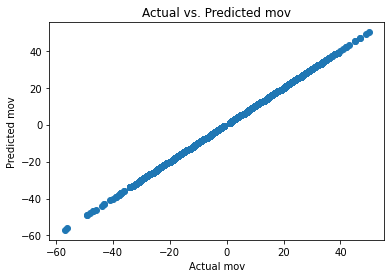

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mov')
plt.ylabel('Predicted mov')
plt.title('Actual vs. Predicted mov')
plt.show()

In [30]:
X = df[['pts', 'blk', 'total', 'total_opp']]
y = df['mov']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()

# Fit transform numeric data
scaler.fit(X_train)
X_scaled = pd.DataFrame(
    scaler.transform(X_train),
    # index is important to ensure we can concatenate with other columns
    index=X_train.index,
    columns=X_train.columns
)
X_scaled

,pts,blk,total,total_opp
7625,1.690694,0.463084,1.690694,0.987726
2737,-0.335711,0.463084,-0.335711,-0.496715
16393,1.768632,0.463084,1.768632,2.003397
9672,-0.725405,0.059277,-0.725405,1.300240
7168,0.833369,-0.748337,0.833369,0.206441
...,...,...,...,...
11284,-1.270975,0.463084,-1.270975,-0.731101
11964,0.209859,-1.152144,0.209859,2.394039
5390,2.548019,-1.152144,2.548019,2.862810
860,-0.647466,-1.152144,-0.647466,-1.590514


In [32]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    # index is important to ensure we can concatenate with other columns
    index=X_test.index,
    columns=X_test.columns
)
X_test_scaled

,pts,blk,total,total_opp
17329,0.833369,0.866892,0.833369,0.362698
11605,-1.894484,-1.152144,-1.894484,-0.027944
2791,-0.959221,0.059277,-0.959221,1.925268
7615,0.833369,-0.344530,0.833369,0.675212
3615,-1.894484,0.463084,-1.894484,1.925268
...,...,...,...,...
17484,-0.881282,0.059277,-0.881282,-0.418587
14363,0.131921,-0.344530,0.131921,-0.496715
10337,0.287798,-0.344530,0.287798,0.440827
3352,0.677491,1.270699,0.677491,-1.043615


In [33]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_scaled, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test_scaled)
y_pred

array([  6., -24., -37., ...,  -2.,  22.,   2.])

In [35]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 1.00


In [36]:
mse = mean_squared_error(y_test, y_pred)
mse

1.3461215130693577e-29

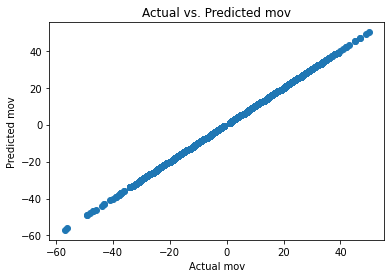

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mov')
plt.ylabel('Predicted mov')
plt.title('Actual vs. Predicted mov')
plt.show()

In [41]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_scaled, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred2 = model2.predict(X_test_scaled)
y_pred2

array([  6.  , -23.9 , -37.01, ...,  -2.  ,  21.98,   2.  ])

In [45]:
r2 = r2_score(y_test, y_pred2)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 1.00


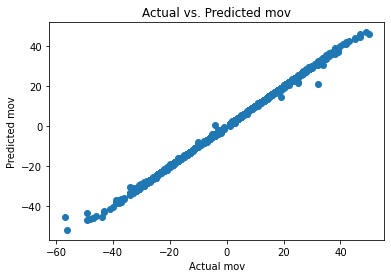

In [46]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual mov')
plt.ylabel('Predicted mov')
plt.title('Actual vs. Predicted mov')
plt.show()

In [47]:
mse = mean_squared_error(y_test, y_pred2)
mse

0.15009178621659633

# pipeline

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['pts', 'total', 'pts_opp', 'total_opp'])  # Add columns to be standardized
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['pts', 'total', 'pts_opp', 'total_opp'])])

In [53]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # You can adjust hyperparameters here
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pts', 'total', 'pts_opp',
                                                   'total_opp'])])),
                ('model', RandomForestRegressor(random_state=42))])

# LogisticRegression

In [61]:
import numpy as np

In [71]:
msk = np.random.rand(len(df))< 0.08
train_df = df[msk]
test_df = df[~msk]

In [72]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.001, C=1.0, fit_intercept=True,
                   intercept_scaling=1, class_weight='balanced', random_state=None,
                   solver='liblinear', max_iter=100,)
clf.fit(X_train, np.ravel(y_train.values))
y_pred = clf.predict_proba(X_test)
y_pred = y_pred[:,1]
display(y_pred,test_df)

array([4.36167923e-21, 7.33408625e-11, 3.10475729e-09, ...,
       2.45180188e-19, 1.87267557e-24, 9.28527422e-20])

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,mov
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,3
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,-3
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,-8
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,8
4,240.0,27.0,86.0,0.314,6.0,26.0,

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.round(y_pred))

0.0

In [78]:
def get_schedule(year):
    games = list(range(1,82))
    schedule_df = pd.DataFrame()
    for w in range(len(games)):
        date_string = str(games)

In [82]:
list(df['team'].unique())

['ATL',
 'DAL',
 'MIN',
 'SAS',
 'ORL',
 'MEM',
 'LAC',
 'SAC',
 'CLE',
 'CHO',
 'BRK',
 'UTA',
 'NOP',
 'CHI',
 'PHO',
 'GSW',
 'IND',
 'MIL',
 'POR',
 'HOU',
 'PHI',
 'OKC',
 'DET',
 'TOR',
 'LAL',
 'WAS',
 'BOS',
 'DEN',
 'MIA',
 'NYK']

# win classification 

In [200]:
def add_target(team):
    team['target']= team['won'].shift(-1)
    return team

In [201]:
df=df.groupby('team', group_keys=False).apply(add_target)

In [202]:
df['target'].fillna(2, inplace=True)

In [203]:
df['target']= df['target'].astype(int, errors='ignore')

In [204]:
df['target'] = df['target'].replace({True: 1, False: 0})

In [205]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,2016,2015-12-09,True,1
1,240.0,36.0,100.0,0.360,7.0,31.0,0.226,16.0,19.0,0.842,20.0,31.0,51.0,18.0,7.0,3.0,9.0,15.0,95.0,0.438,0.395,0.310,0.190,32.8,83.8,52.0,50.0,7.4,4.9,7.7,100.0,100.5,103.7,8.0,20.0,1.000,2.0,8.0,0.500,6.0,7.0,1.0,7.0,10.0,17.0,6.0,3.0,2.0,2.0,4.0,18.0,11.0,0.862,1.000,0.500,3.000,14.6,34.3,22.0,31.0,4.9,4.4,22.8,29.0,178.0,111.0,DAL,95,1,240.0,39.0,81.0,0.481,6.0,20.0,0.300,14.0,18.0,0.778,6.0,41.0,47.0,26.0,7.0,7.0,14.0,19.0,98.0,0.551,0.519,0.247,0.222,16.2,67.2,48.0,66.7,7.4,10.1,13.6,100.0,103.7,100.5,7.0,13.0,0.667,2.0,6.0,1.000,6.0,9.0,1.0,2.0,9.0,11.0,6.0,3.0,2.0,4.0,4.0,20.0,9.0,0.667,0.667,1.000,0.692,23.0,27.6,21.7,26.5,4.3,6.2,50.0,32.6,152.0,111.0,ATL,98,0,2016,2015-12-09,False,0
2,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,2018,2017-10-18,False,1
3,240.0,41.0,89.0,0.461,8.0,21.0,0.381,17.0,19.0,0.895,12.0,38.0,50.0,22.0,8.0,11.0,11.0,18.0,107.0,0.550,0.506,0.236,0.213,27.9,77.6,54.3,53.7,8.5,16.7,10.2,100.0,113.3,104.8,9.0,21.0,0.875,3.0,7.0,1.000,6.0,7.0,1.0,5.0,9.0,10.0,4.0,2.0,3.0,3.0,4.0,25.0,15.0,0.901,0.875,1.000,0.571,17.3,45.9,24.5,25.4,4.5,7.6,20.0,30.9,148.0,116.0,SAS,107,1,240.0,37.0,85.0,0.435,8.0,19.0,0.421,17.0,23.0,0.739,11.0,31.0,42.0,23.0,7.0,4.0,13.0,16.0,99.0,0.520,0.482,0.224,0.271,22.4,72.1,45.7,62.2,7.4,5.9,12.0,100.0,104.8,113.3,9.0,15.0,0.643,4.0,6.0,0.667,4.0,9.0,1.0,3.0,11.0,13.0,6.0,2.0,1.0,3.0,4.0,26.0,15.0,0.740,0.786,0.429,0.833,21.8,35.6,19.7,37.1,3.8,5.0,28.6,30.9,138.0,118.0,MIN,99,0,2018,2017-10-18,True,0
4,240.0,27.0,86.0,0.314,6.0,26.0

In [91]:
pip install mlxtend

     |████████████████████████████████| 1.4 MB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [227]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [234]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

In [235]:
rr= RidgeClassifier(alpha=1)
split=TimeSeriesSplit(n_splits=3)
sfs= SequentialFeatureSelector(rr, cv=split)

In [236]:
remove= ['won','season', 'target', 'date', 'team', 'team_opp']

In [237]:
picked=df.columns[~df.columns.isin(remove)]
picked

Index(['mp', 'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%',
       ...
       'trb%_max_opp', 'ast%_max_opp', 'stl%_max_opp', 'blk%_max_opp',
       'tov%_max_opp', 'usg%_max_opp', 'ortg_max_opp', 'drtg_max_opp',
       'total_opp', 'home_opp'],
      dtype='object', length=136)

In [238]:
scaler2=MinMaxScaler()

In [239]:
print(scaler.get_feature_names_out())

['pts' 'blk' 'total' 'total_opp']


In [240]:
df[picked] = scaler2.fit_transform(df[picked])

In [241]:
df

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,tov%,usg%,ortg,drtg,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,total,home,mp_opp,fg_opp,fga_opp,fg%_opp,3p_opp,3pa_opp,3p%_opp,ft_opp,fta_opp,ft%_opp,orb_opp,drb_opp,trb_opp,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,ts%_opp,efg%_opp,3par_opp,ftr_opp,orb%_opp,drb%_opp,trb%_opp,ast%_opp,stl%_opp,blk%_opp,tov%_opp,usg%_opp,ortg_opp,drtg_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won,target
0,0.0,0.454545,0.308824,0.507177,0.206897,0.242424,0.356295,0.302326,0.269841,0.740957,0.214286,0.625,0.510204,0.441860,0.318182,0.35,0.448276,0.361111,0.326923,0.463466,0.457760,0.315625,0.264484,0.308571,0.375238,0.445946,0.650930,0.341014,0.262338,0.470149,0.0,0.389682,0.354555,0.190476,0.119048,0.487692,0.142857,0.217391,1.000,0.20,0.228571,1.0,0.153846,0.30,0.269231,0.173913,0.3,0.181818,0.272727,0.50,0.166667,0.360000,0.167,0.230840,1.00000,0.044858,0.230,0.132934,0.138614,0.157110,0.043,0.062,0.475891,0.134788,0.298578,0.400000,ATL,0.326923,0.0,0.0,0.386364,0.588235,0.217703,0.241379,0.409091,0.268409,0.348837,0.285714,0.815636,0.714286,0.375,0.591837,0.255814,0.318182,0.15,0.275862,0.250000,0.298077,0.227557,0.214145,0.414062,0.224181,0.624762,0.691429,0.554054,0.412017,0.341014,0.127273,0.250000,0.0,0.354555,0.389682,0.238095,0.285714,1.000000,0.142857,0.304348,0.500,0.20,0.171429,1.0,0.538462,0.35,0.500000,0.173913,0.3,0.181818,0.090909,0.50,0.133333,0.386667,0.362,0.538319,0.37500,0.210507,0.146,0.213174,0.141914,0.208716,0.049,0.044,0.190776,0.088575,0.421801,0.400000,DAL,0.298077,1.0,2016,2015-12-09,True,1
1,0.0,0.386364,0.588235,0.217703,0.241379,0.409091,0.268409,0.348837,0.285714,0.815636,0.714286,0.375,0.591837,0.255814,0.318182,0.15,0.275862,0.250000,0.298077,0.227557,0.214145,0.414062,0.224181,0.624762,0.691429,0.554054,0.412017,0.341014,0.127273,0.250000,0.0,0.354555,0.389682,0.238095,0.285714,1.000000,0.142857,0.304348,0.500,0.20,0.171429,1.0,0.538462,0.35,0.500000,0.173913,0.3,0.181818,0.090909,0.50,0.133333,0.386667,0.362,0.538319,0.37500,0.210507,0.146,0.213174,0.141914,0.208716,0.049,0.044,0.190776,0.088575,0.421801,0.400000,DAL,0.298077,1.0,0.0,0.454545,0.308824,0.507177,0.206897,0.242424,0.356295,0.302326,0.269841,0.740957,0.214286,0.625,0.510204,0.441860,0.318182,0.35,0.448276,0.361111,0.326923,0.463466,0.457760,0.315625,0.264484,0.308571,0.375238,0.445946,0.650930,0.341014,0.262338,0.470149,0.0,0.389682,0.354555,0.190476,0.119048,0.487692,0.142857,0.217391,1.000,0.20,0.228571,1.0,0.153846,0.30,0.269231,0.173913,0.3,0.181818,0.272727,0.50,0.166667,0.360000,0.167,0.230840,1.00000,0.044858,0.230,0.132934,0.138614,0.157110,0.043,0.062,0.475891,0.134788,0.298578,0.400000,ATL,0.326923,0.0,2016,2015-12-09,False,0
2,0.0,0.409091,0.367647,0.397129,0.275862,0.227273,0.500000,0.372093,0.349206,0.695449,0.392857,0.375,0.408163,0.372093,0.318182,0.20,0.413793,0.277778,0.336538,0.398747,0.385069,0.279687,0.326196,0.426667,0.468571,0.383784,0.586552,0.341014,0.153247,0.410448,0.0,0.401756,0.495060,0.285714,0.166667,0.450769,0.285714,0.217391,0.667,0.12,0.228571,1.0,0.230769,0.40,0.346154,0.173913,0.2,0.090909,0.181818,0.50,0.266667,0.440000,0.240,0.340720,0.28625,0.054977,0.218,0.228743,0.116612,0.278670,0.038,0.050,0.251572,0.112965,0.232227,0.482353,MIN,0.336538,0.0,0.0,0.500000,

In [242]:
sfs.fit(df[picked], df['target'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1), k_features=(1, 1),
                          scoring='accuracy')

In [250]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge

model = Ridge()  # or any other model you want to use
sfs = SequentialFeatureSelector(model, k_features="best", forward=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

selected_features = list(sfs.subsets_[len(sfs.k_feature_names_)]['feature_names'])
selected_features

['pts', 'total', 'total_opp']

In [249]:
selected_features = list(sfs.subsets_[len(sfs.k_feature_names_)]['feature_names'])
selected_features

['pts', 'total', 'total_opp']

In [259]:
def backtest(data, model2, selected_features, start=2, step=1):
    all_predictions= []
    
    seasons= sorted(data['season'].uniquie())
    
    for i in range(start, len(seasons), step):
        season= seasons[i]
        
        train=data[data['season']< season]
        train=data[data['season']== season]
        
        model2.fit(train[selected_features], train['target'])
        
        preds= model2.predict(test[selected_features])
        preds= pd.Series(preds, index=test.index)
        
        combined = pd.concat([test['target'],preds], axis=1)
        combined.columns = ['actual', 'selected_features']
        
        all_selected_features.append(combined)
    return pd.concat(all_selected_features)

In [258]:
seasons = sorted(df['season'].unique())

In [265]:
from sklearn.metrics import accuracy_score

accuracy_score(selected_features['actual'], selected_features['prediction'])

TypeError: list indices must be integers or slices, not str